In [1]:
%matplotlib inline

import collections

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import neptune
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(16, 12)})
sns.set_style('ticks', 
              rc={'axes.grid': True,
               'grid.color': '.8',
               'grid.linestyle': '-',
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False,
              })
sns.set_context("paper", font_scale=1.4)

In [7]:
data = pd.read_csv('data/multiround_results.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_arms     1440 non-null   int64  
 1   min_gap      1440 non-null   float64
 2   num_threads  1440 non-null   int64  
 3   epsilon      1440 non-null   float64
 4   delta        1440 non-null   float64
 5   elapsed      1440 non-null   int64  
 6   pulls        1440 non-null   int64  
 7   solved       1440 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 90.1 KB


In [10]:
data.describe()

,num_arms,min_gap,num_threads,epsilon,delta,elapsed,pulls,solved
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1.440000e+03,1.440000e+03,1440.000000
mean,27775.000000,0.142200,41.500000,0.077750,0.053333,1.183061e+05,5.024588e+08,0.566667
std,41892.966466,0.147697,43.778773,0.080528,0.036831,3.525683e+05,1.338962e+09,0.495708
min,100.000000,0.001000,1.000000,0.001000,0.010000,0.000000e+00,1.969600e+04,0.000000
25%,775.000000,0.010000,8.000000,0.007750,0.010000,2.565000e+02,1.703104e+06,0.000000
50%,5500.000000,0.100000,24.000000,0.055000,0.050000,4.845000e+03,2.333692e+07,1.000000
75%,32500.000000,0.200000,64.000000,0.125000,0.100000,5.488075e+04,2.500659e+08,1.000000
max,100000.000000,0.400000,128.000000,0.200000,0.100000,4.317258e+06,1.348107e+10,1.000000


In [8]:
data.sample(10)

,num_arms,min_gap,num_threads,epsilon,delta,elapsed,pulls,solved
717,1000,0.001,32,0.001,0.01,176098,665170688,0
1368,100000,0.001,1,0.200,0.10,20810,919746592,0
844,10000,0.200,64,0.010,0.01,7284,22986560,1
984,10000,0.010,1,0.010,0.01,19034,841596035,0
817,10000,0.200,8,0.100,0.05,5365,19325664,1
1176,100000,0.200,1,0.100,0.05,5095,230672551,1
1005,10000,0.010,32,0.001,0.01,163415,622707424,0
233,100,0.010,128,0.200,0.01,243,704000,0
38,100,0.400,16,0.010,0.10,9,30528,1
1347,100000,0.010,32,0.010,0.01,1341523,5134932672,0


In [29]:
df = data[((data.solved == 1) & (data.num_arms <= 10_000) & (data.min_gap > 0.01))]

In [30]:
df.describe()

,num_arms,min_gap,num_threads,epsilon,delta,elapsed,pulls,solved
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,6.100000e+02,610.0
mean,3648.360656,0.241639,41.673770,0.070298,0.053180,2792.714754,1.172586e+07,1.0
std,4455.144691,0.123989,43.826949,0.077011,0.036811,6250.508521,2.511822e+07,0.0
min,100.000000,0.100000,1.000000,0.001000,0.010000,0.000000,1.969600e+04,1.0
25%,100.000000,0.100000,8.000000,0.001000,0.010000,73.750000,3.433775e+05,1.0
50%,1000.000000,0.200000,32.000000,0.010000,0.050000,264.000000,1.653001e+06,1.0
75%,10000.000000,0.400000,64.000000,0.100000,0.100000,2022.500000,7.440384e+06,1.0
max,10000.000000,0.400000,128.000000,0.200000,0.100000,40967.000000,1.908251e+08,1.0


# Num. threads x Time

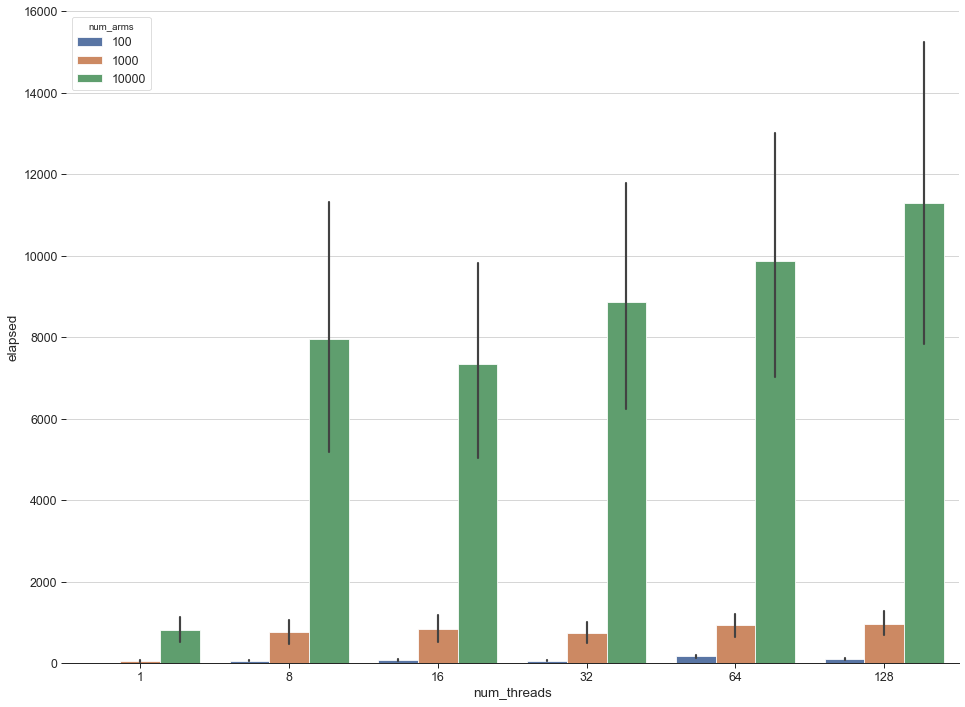

In [31]:
sns.barplot(x='num_threads', y='elapsed', hue='num_arms', data=df)

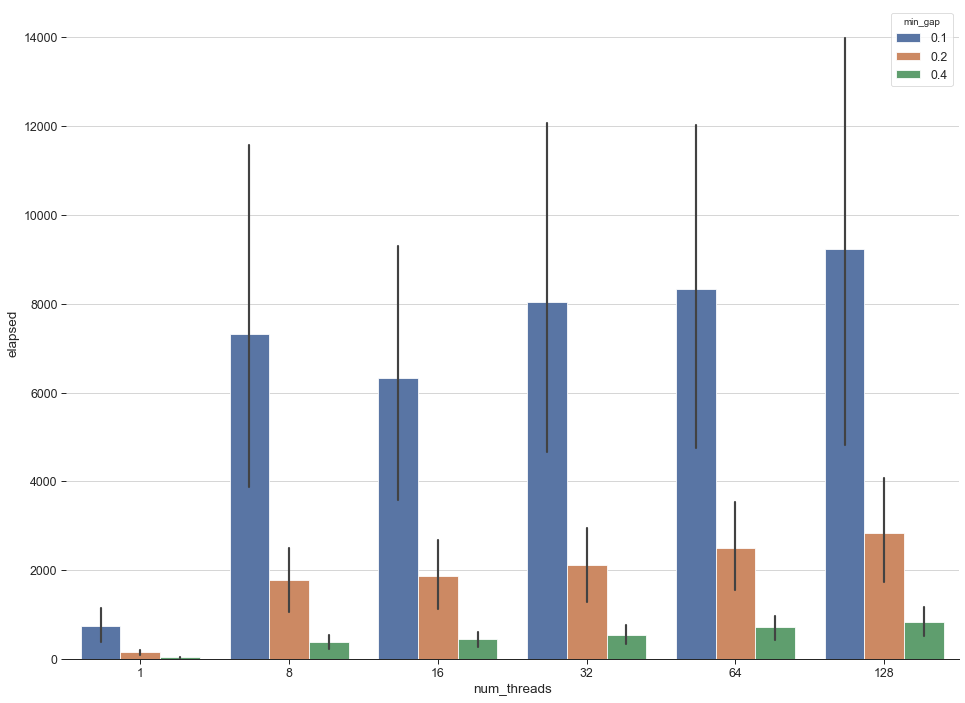

In [32]:
sns.barplot(x='num_threads', y='elapsed', hue='min_gap', data=df)

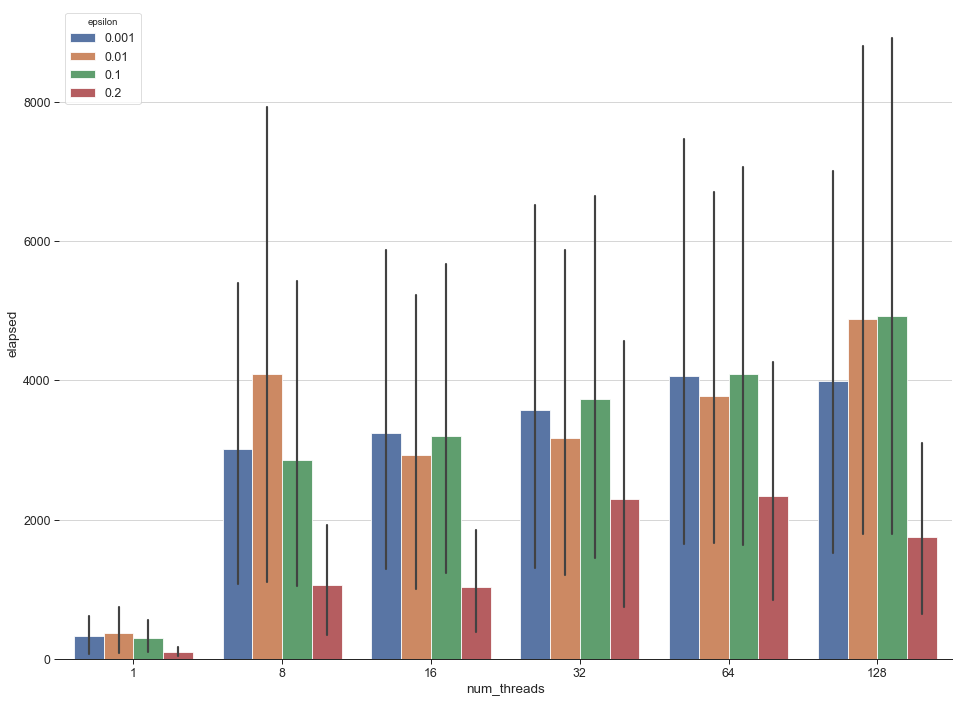

In [33]:
sns.barplot(x='num_threads', y='elapsed', hue='epsilon', data=df)

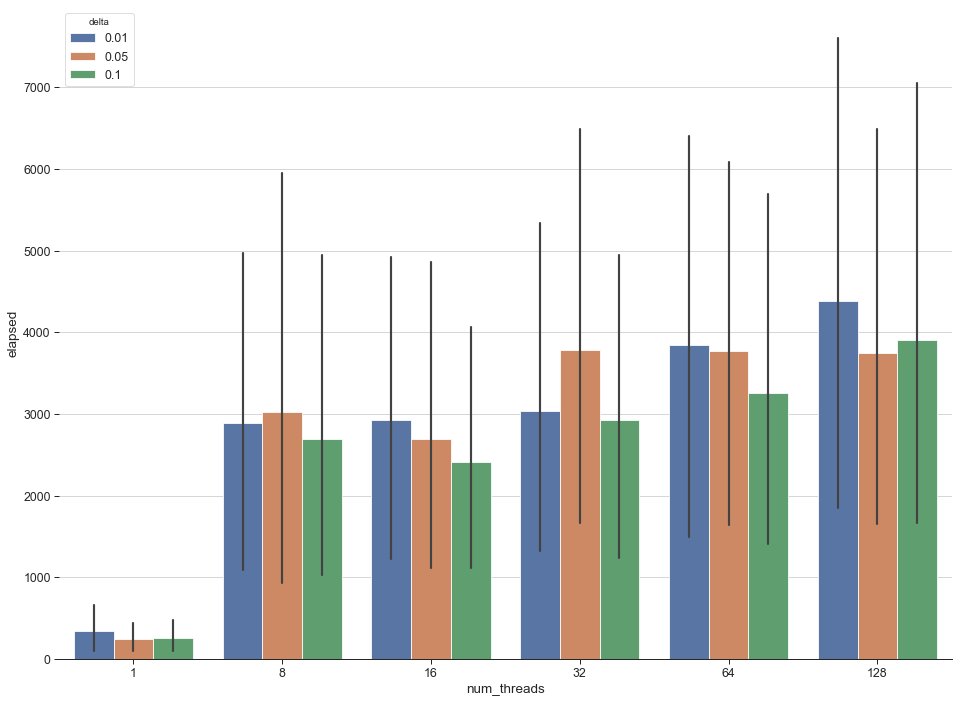

In [34]:
sns.barplot(x='num_threads', y='elapsed', hue='delta', data=df)

# Num. threads x Pulls

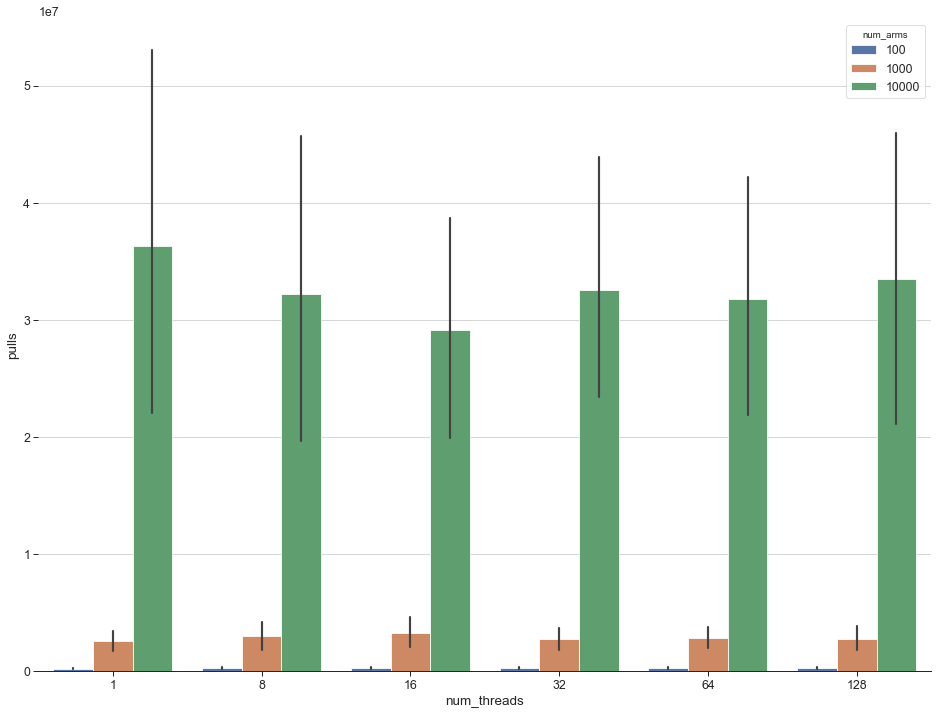

In [35]:
sns.barplot(x='num_threads', y='pulls', hue='num_arms', data=df)

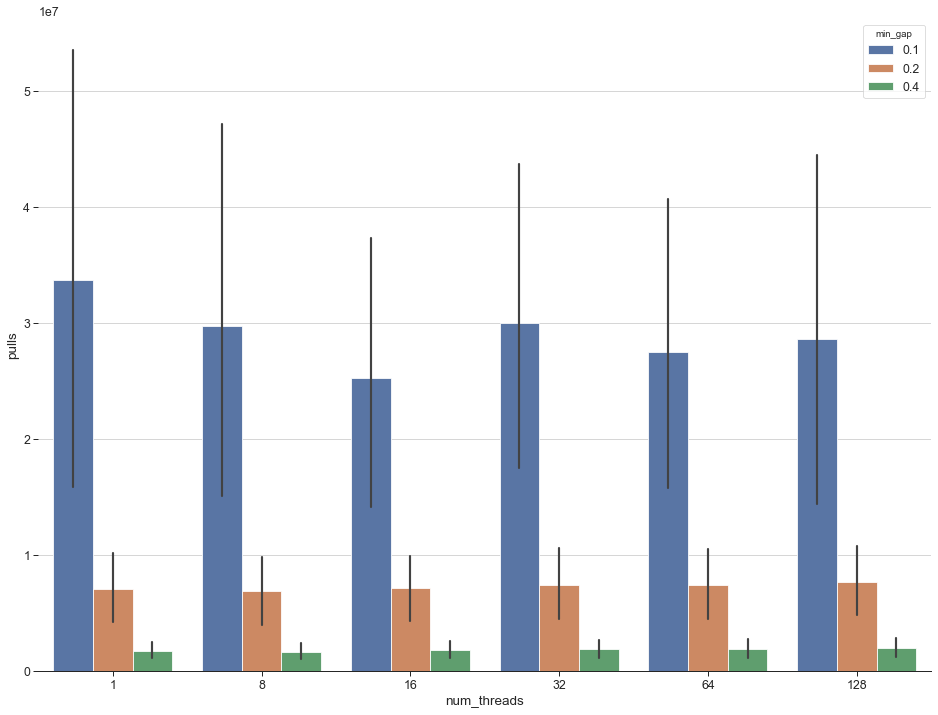

In [36]:
sns.barplot(x='num_threads', y='pulls', hue='min_gap', data=df)

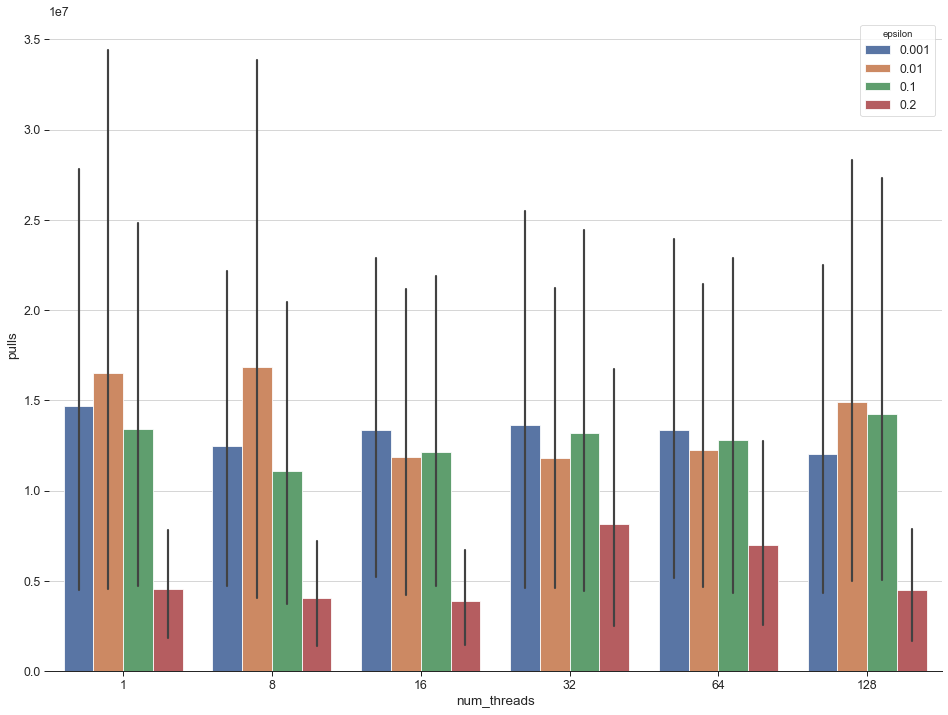

In [37]:
sns.barplot(x='num_threads', y='pulls', hue='epsilon', data=df)

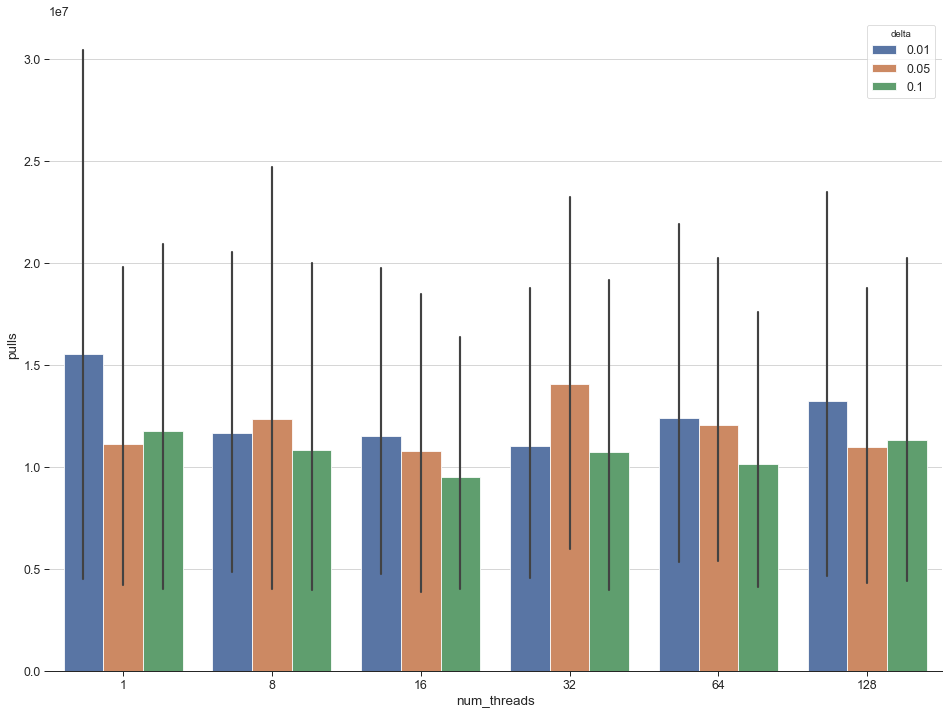

In [38]:
sns.barplot(x='num_threads', y='pulls', hue='delta', data=df)